In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### 1. Загружаем тестовый датасет и анализируем основные параметры

In [2]:

rent = pd.read_csv("../House Rent Prediction/House_Rent_Dataset.csv", index_col=0)
rent.head()


,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
Posted On,,,,,,,,,,,
2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
rent.shape

(4746, 11)

In [4]:
rent.dtypes

BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

**BHK**: Number of Bedrooms, Hall, Kitchen.\
**Rent**: Rent of the Houses/Apartments/Flats.\
**Size**: Size of the Houses/Apartments/Flats in Square Feet.\
**Floor**: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)\
**Area Type**: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.\
**Area Locality**: Locality of the Houses/Apartments/Flats.\
**City**: City where the Houses/Apartments/Flats are Located.\
**Furnishing Status**: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.\
**Tenant Preferred**: Type of Tenant Preferred by the Owner or Agent.\
**Bathroom**: Number of Bathrooms.\
**Point of Contact**: Whom should you contact for more information regarding the Houses/Apartments/Flats.\

In [5]:
rent.isna().sum()

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [6]:
rent.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


**Исследуемый датасет имеет 11 признаков, объемом 4746 строк. В датасете нет значений Null. Рассмотрим основные признаки**

### 2. Анализ основных признаков

In [15]:
def univariate_plot_2(df, x=None, xlabel=None, explode=None):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.countplot(data=df, x=x, ax=ax[0], order=df[x].value_counts(ascending=True).index)
    df[x].value_counts(ascending=True).plot(kind="pie", autopct="%1.1f%%", ax=ax[1])
#    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    ax[0].bar_label(ax[0].containers[0])
    plt.show()

In [51]:
def univariate_plot_3(df, x=None, xlabel=None,bar_label=True, log_scale=False):
    fig, ax = plt.subplots(1, 1, figsize=(12, 7))
#    sns.histplot(data=df, x=x, kde=True, ax=ax[0], log_scale=log_scale,bins=40)
    sns.boxplot(data=df, x=x)
    plt.show()

### 2.1 Число спален, залов и кухонь

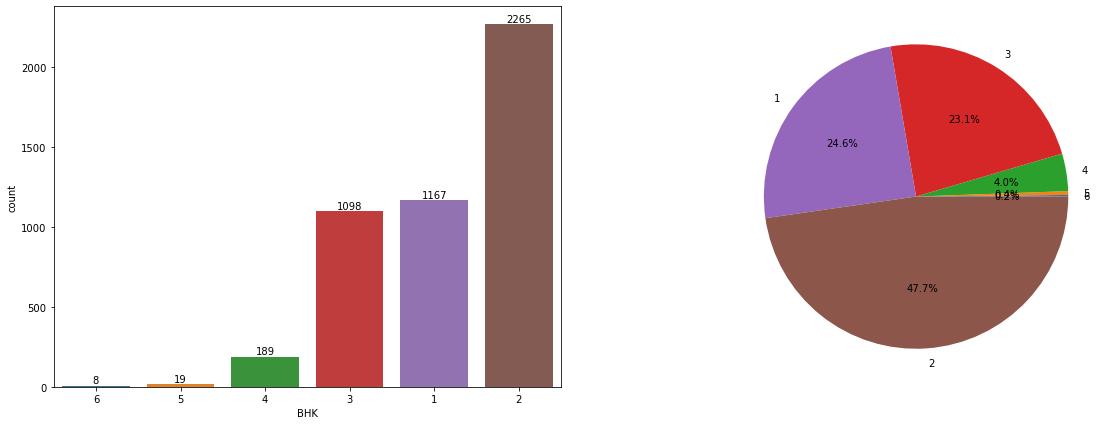

In [19]:
univariate_plot_2(df = rent, x="BHK", xlabel="BHK")

### 2.2 Арендная плата

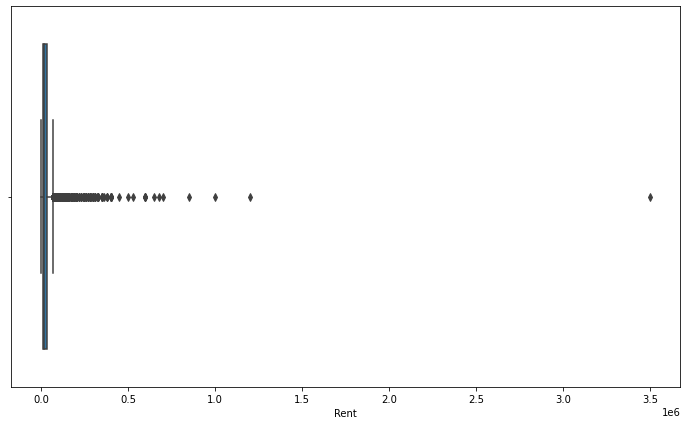

In [52]:
univariate_plot_3(df = rent, x="Rent", xlabel="Rent")

### 2.3 Площадь помещения

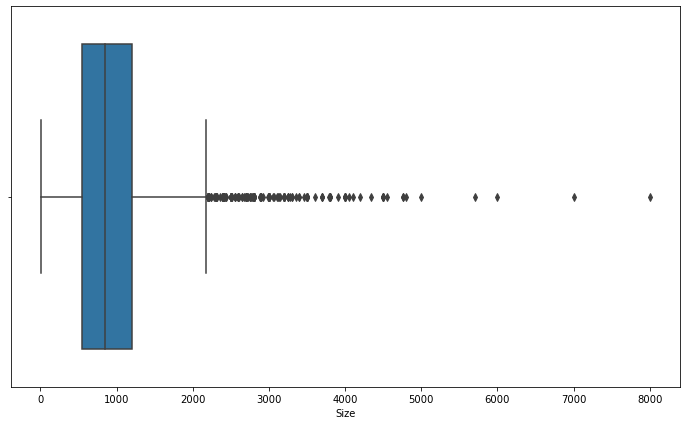

In [53]:
univariate_plot_3(df = rent, x="Size", xlabel="Size")

### 2.4 Города размещения

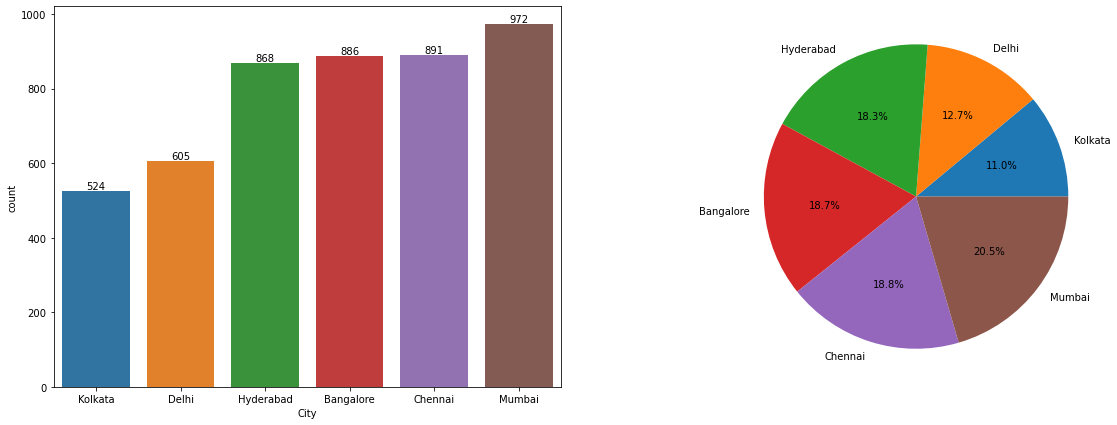

In [32]:
univariate_plot_2(df = rent, x="City", xlabel="City")

### 2.5 Меблировка

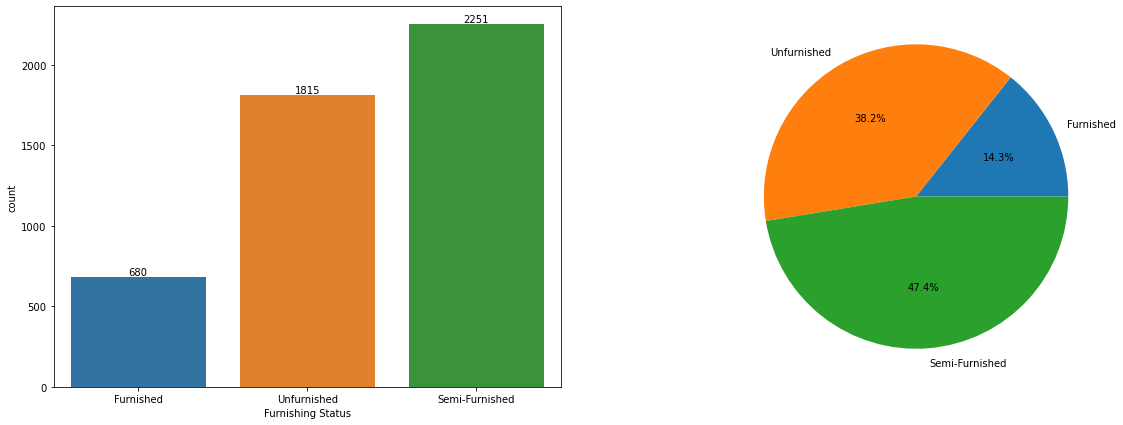

In [38]:
univariate_plot_2(df = rent, x="Furnishing Status", xlabel="Furnishing Status")

### 2.6 Семья/одиночка

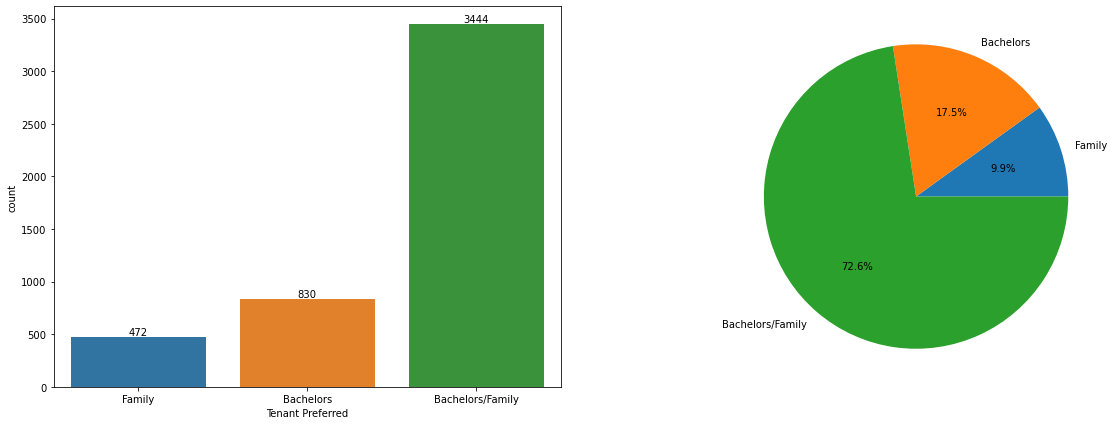

In [37]:
univariate_plot_2(df = rent, x="Tenant Preferred", xlabel="Tenant Preferred")

### 2.7 Число ванных комнат

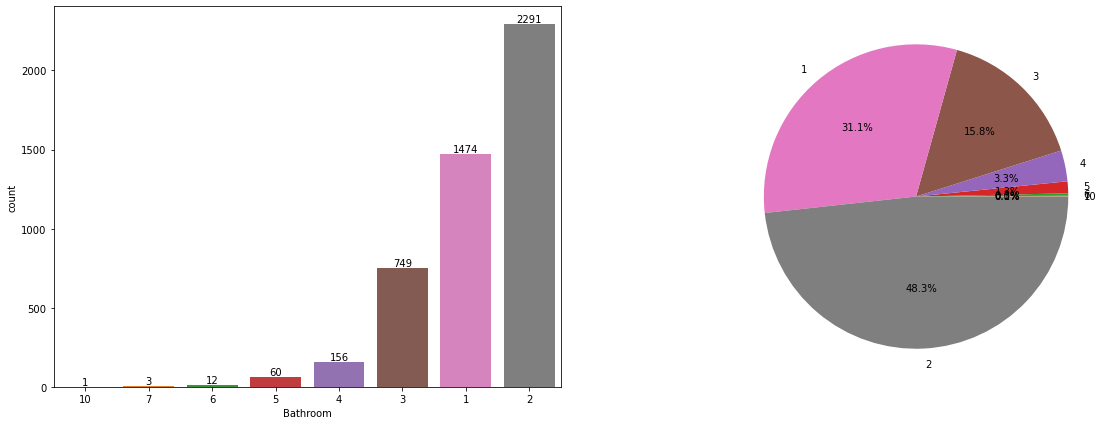

In [39]:
univariate_plot_2(df = rent, x="Bathroom", xlabel="Bathroom")

### 2.8 Контактное лицо

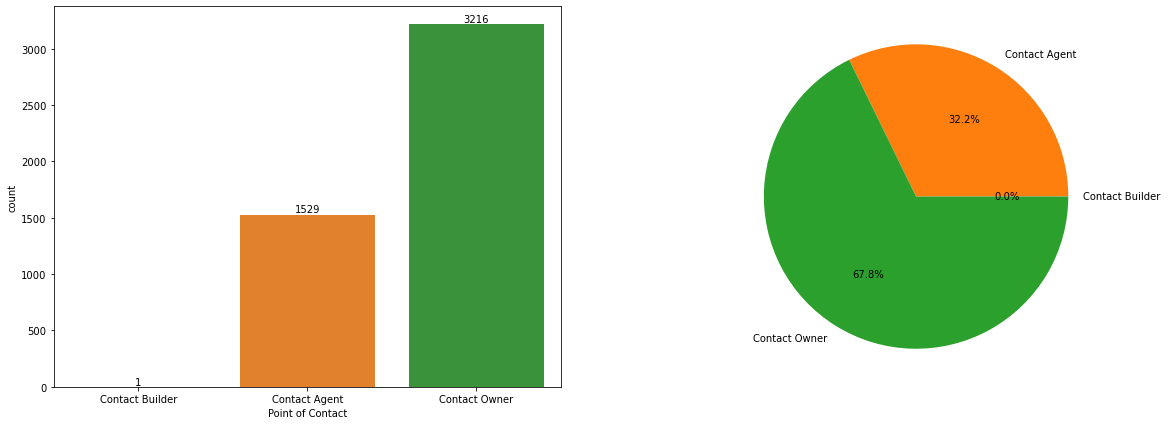

In [40]:
univariate_plot_2(df = rent, x="Point of Contact", xlabel="Point of Contact")

### 2.9 Корреляция признаков

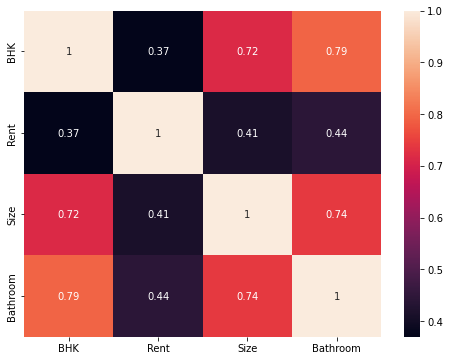

In [63]:
corr = rent.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corr, vmax = 1,square = False,annot=True)
plt.show()

### 3. Построение модели

### 3.1 Подготовка данных 

**Удалим ненужные колонки и используем унитарное кодирование (One Hot Encoding).**

In [66]:
##Dropping unnecesaary columns from dataset
rent = rent.drop(['Area Locality','Floor'],axis=1)
rent.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
Posted On,,,,,,,,,
2022-05-18,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
2022-05-13,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2022-05-16,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2022-07-04,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
2022-05-09,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [68]:
rent = pd.get_dummies(rent, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])
rent.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
Posted On,,,,,,,,,,,,,,,,,,,,,
2022-05-18,2,10000,1100,2,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2022-05-13,2,20000,800,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2022-05-16,2,17000,1000,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2022-07-04,2,10000,800,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2022-05-09,2,7500,850,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


**Разделим датасет на 2 выборки: для обучения и тестирования**

In [69]:
X = rent.drop('Rent',axis=1)
y = rent['Rent']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

**Предобработка данных**

In [71]:
# Scaling the data
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

In [72]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [73]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [75]:
print(X_train,y_train)

[[ 1.07242196  0.99751713  0.03208951 ...  1.4467584  -0.01735264
  -1.44576366]
 [-0.11392028 -0.36341383  0.03208951 ...  1.4467584  -0.01735264
  -1.44576366]
 [-1.30026253 -1.05017992 -1.09002997 ... -0.69120041 -0.01735264
   0.69167598]
 ...
 [-0.11392028 -0.26260413  0.03208951 ...  1.4467584  -0.01735264
  -1.44576366]
 [ 1.07242196  3.99030514  1.15420899 ...  1.4467584  -0.01735264
  -1.44576366]
 [-1.30026253 -0.81390719  0.03208951 ...  1.4467584  -0.01735264
  -1.44576366]] [[ 0.34978649]
 [ 0.47937846]
 [-0.34529773]
 ...
 [-0.18036249]
 [ 0.58540826]
 [-0.12145705]]


### 3.2 Построение регрессионных моделей(Supervised Learning)

**Linear Regression**

In [88]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

In [89]:
# Evaluation metrics
mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)
mse_lm =  metrics.mean_squared_error(y_test, lm_prediction)
rmse_lm =  np.sqrt(mse_lm)

In [90]:
print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)

MAE: 127933434032.16122
MSE: 2.719782318968109e+22
RMSE: 164917625467.02246


In [113]:
lm.score(X_train, y_train)

0.26968988240432945

**Decision Tree**

In [91]:
dt = DecisionTreeRegressor(random_state = 100)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

In [92]:
# Evaluation metrics
mae_dt = metrics.mean_absolute_error(y_test, dt_prediction)
mse_dt =  metrics.mean_squared_error(y_test, dt_prediction)
rmse_dt =  np.sqrt(mse_dt)

In [93]:
print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)

MAE: 0.2891475825848841
MSE: 1.4567566488520176
RMSE: 1.2069617429115214


In [112]:
dt.score(X_train, y_train)

0.9944279646228372

**Random Forest**

In [108]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train.ravel())
rf_prediction = rf.predict(X_test)

In [109]:
# Evaluation metrics
mae_rf = metrics.mean_absolute_error(y_test, rf_prediction)
mse_rf =  metrics.mean_squared_error(y_test, rf_prediction)
rmse_rf =  np.sqrt(mse_rf)

In [110]:
print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)

MAE: 0.2641431510449144
MSE: 0.7463667182329609
RMSE: 0.8639251809230709


In [111]:
rf.score(X_train, y_train)

0.8730578586508353

**Выводы:**
- В данном датасете мы проанализировали основные признаки и построили их графики.
- Также мы построили модели для предсказания стоимости арендной платы жилья в зависимости от различных признаков.
- Все модели показали различные результаты и ошибки. В зависимости от наших задач мы можем выбрать определнную модель и использовать ее.